In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [2]:
def Lorentzian(x, small_gamma):
    columns = np.size(x)
    p = [0 for i in range(columns)]
    for j in range(columns):
        p[j] = 1/(1+(x[j]/small_gamma)**2)
    return p

In [3]:
def Plot_Ergodicity_Condition(MOG_energy, N, realization):
    (rows, columns) = np.shape(MOG_energy)
    mean_G_energy = [np.mean(MOG_energy[realization][:],axis = 0) for i in range(columns)]
    
    fig, axs = plt.subplots(1,2, figsize = (12,5), constrained_layout = True)
    fig.suptitle(r'CONDUCTANCE FOR N = '+str(N), fontsize = 20)
    
    axs[0].plot([(i-30) for i in range(columns)], MOG_energy[realization])
    axs[0].plot([(i-30) for i in range(columns)], mean_G_energy, color = 'red', linestyle = 'dashed')
    axs[0].set_xlabel(r'$\epsilon$', fontsize = 20)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
    axs[0].set_ylabel(r'$<G>_{steps}(\epsilon)$', fontsize = 20)
    
    axs[1].plot([i for i in range(rows)], MOG_energy[:,0])
    axs[1].plot([i for i in range(rows)], [np.mean(MOG_energy[:,0]) for i in range(rows)], color = 'red', linestyle = 'dashed')
    axs[1].set_xlabel(r'$steps$', fontsize = 20)
    axs[1].set_ylabel(r'$<G>_{\epsilon}(steps)$', fontsize = 20)
    
    for i in range(2):
        axs[i].grid(linestyle = ':')

In [4]:
def Auto_correlation(MOG_energy):
    (rows, columns) = np.shape(MOG_energy)
    geg0 = np.zeros((rows, columns))
    c = np.zeros((1, columns))
    for j in range(columns):
        geg0[:,j] = np.multiply(MOG_energy[:,j], MOG_energy[:,0])
        c[0,j] = (np.mean(geg0[:,j], axis = 0)-np.multiply(np.mean(MOG_energy[:,j], axis = 0),np.mean(MOG_energy[:,0], axis = 0)))/(np.var(MOG_energy[:,0], axis = 0))
    return c

In [5]:
def Find_Max(Conductance_Energy_Array, realization):
    
    (rows, columns) = np.shape(Conductance_Energy_Array)
    max_counter = np.zeros(columns)
    for j in range(1,columns-1):
        if ((Conductance_Energy_Array[realization][j-1] < Conductance_Energy_Array[realization][j]) and (Conductance_Energy_Array[realization][j] > Conductance_Energy_Array[realization][j+1])):
            max_counter[j] = 1
    return max_counter

In [6]:
def Plot_Max(Conductance_Gamma_by_Energy, N, realization):
    
    fig, axs = plt.subplots(2,2, figsize = (10,6), constrained_layout = True)
    fig.suptitle('CONDUCTANCE VS ENERGY (N = '+str(N)+')', fontsize = 20)
    print(np.shape(Conductance_Gamma_by_Energy))
    (Gamma_number, iteration ,energy_number) = np.shape(Conductance_Gamma_by_Energy)
    
    energy_min = -(int((energy_number-1)/2))
    energy_max = (int(((energy_number-1)/2) + 1))
    
    x = [i for i in range(energy_min,energy_max)]
    
    axs[0,0].plot(x, Conductance_Gamma_by_Energy[0][realization][:], label = r'$\Gamma = 0.1$')
    axs[0,1].plot(x, Conductance_Gamma_by_Energy[1][realization][:], label = r'$\Gamma = 0.4$')
    axs[1,0].plot(x, Conductance_Gamma_by_Energy[2][realization][:], label = r'$\Gamma = 0.7$')
    axs[1,1].plot(x, Conductance_Gamma_by_Energy[3][realization][:], label = r'$\Gamma = 1$')
    
    axs[0,0].plot(x, [np.mean(Conductance_Gamma_by_Energy[0][realization][:]) for i in range(energy_min,energy_max)], color = 'red', linestyle = 'dashed')
    axs[0,1].plot(x, [np.mean(Conductance_Gamma_by_Energy[1][realization][:]) for i in range(energy_min,energy_max)], color = 'red', linestyle = 'dashed')
    axs[1,0].plot(x, [np.mean(Conductance_Gamma_by_Energy[2][realization][:]) for i in range(energy_min,energy_max)], color = 'red', linestyle = 'dashed')
    axs[1,1].plot(x, [np.mean(Conductance_Gamma_by_Energy[3][realization][:]) for i in range(energy_min,energy_max)], color = 'red', linestyle = 'dashed')
    
    mask_01 = (Find_Max(Conductance_Gamma_by_Energy[0], realization) == 1)
    mask_04 = (Find_Max(Conductance_Gamma_by_Energy[1], realization) == 1)
    mask_07 = (Find_Max(Conductance_Gamma_by_Energy[2], realization) == 1)
    mask_10 = (Find_Max(Conductance_Gamma_by_Energy[3], realization) == 1)
    
    
    for i in range(61):
        if (mask_01[i] == True):
            axs[0,0].scatter(x[i],Conductance_Gamma_by_Energy[0][realization][i], color = 'black')
            
        if (mask_04[i] == True):
            axs[0,1].scatter(x[i],Conductance_Gamma_by_Energy[1][realization][i], color = 'black')
           
        if (mask_07[i] == True):
            axs[1,0].scatter(x[i],Conductance_Gamma_by_Energy[2][realization][i], color = 'black')
            
        if (mask_10[i] == True):
            axs[1,1].scatter(x[i],Conductance_Gamma_by_Energy[3][realization][i], color = 'black')
    
    for i in range(2):
        for j in range(2):
            axs[i,j].legend(fontsize = 18)
            axs[i,j].grid(linestyle = ':')
            axs[i,j].set_ylabel(r'$G$', fontsize = 20)
            axs[i,j].set_xlabel(r'$\epsilon$', fontsize = 20)

In [7]:
list_G_1 = [None]*10
for i in range(10):
    df_G_1 = pd.read_csv(r'Energy/Energy_Channel/G_O_Gamma_N'+str(i+1)+'.txt', sep='\t', header = None)
    MOG_energy_1 = df_G_1.values
    list_G_1[i] = MOG_energy_1

In [8]:
MOG_energy_1 = list_G_1[0]
MOG_energy_2 = list_G_1[1]
MOG_energy_5 = list_G_1[4]
MOG_energy_10 = list_G_1[9]

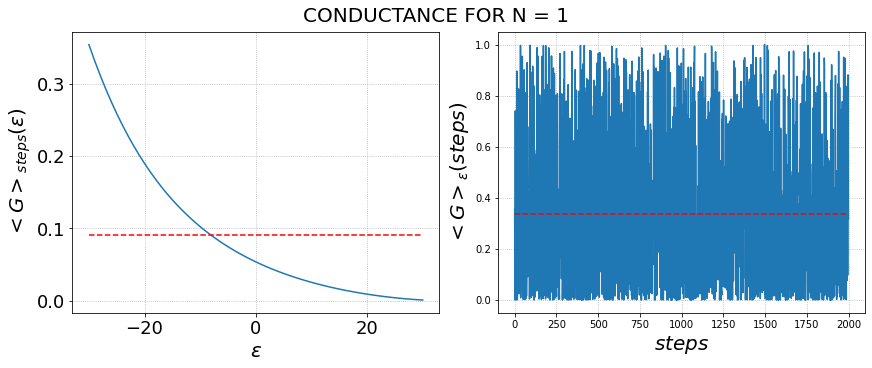

In [9]:
Plot_Ergodicity_Condition(MOG_energy_1, 1, 0)

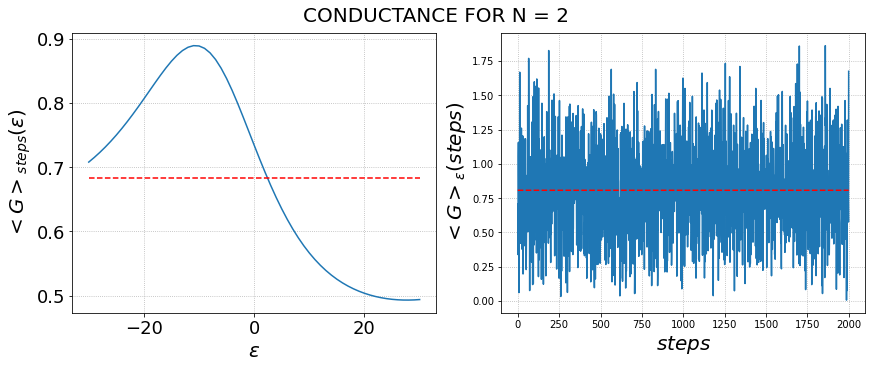

In [10]:
Plot_Ergodicity_Condition(MOG_energy_2, 2, 0)

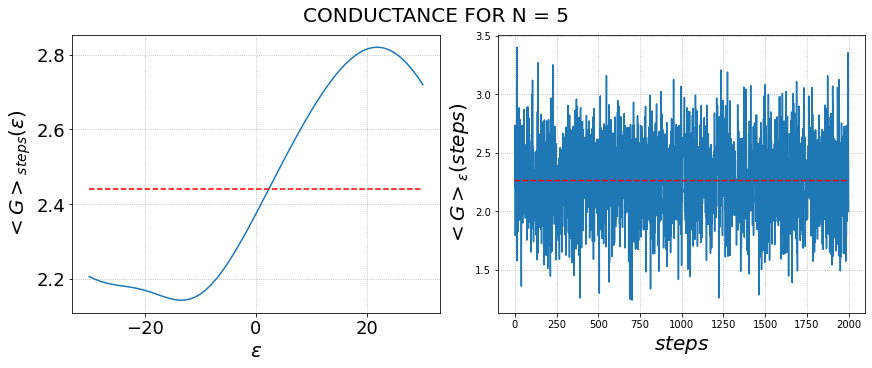

In [11]:
Plot_Ergodicity_Condition(MOG_energy_5, 5, 0)

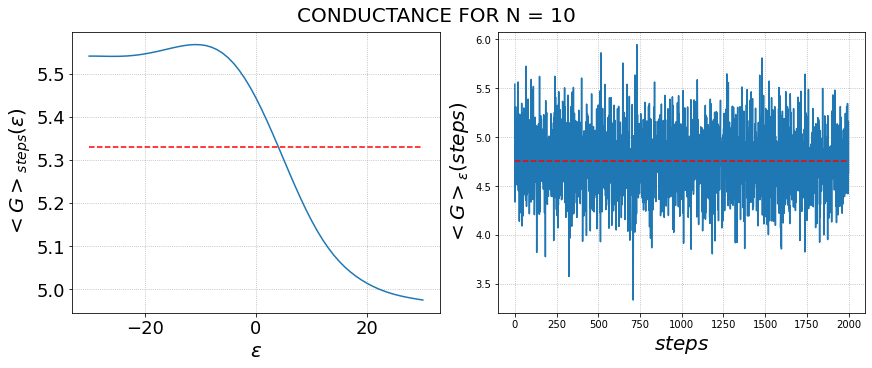

In [12]:
Plot_Ergodicity_Condition(MOG_energy_10, 10, 0)

In [13]:
c_1 = Auto_correlation(MOG_energy_1[:,0:60])
c_2 = Auto_correlation(MOG_energy_2[:,0:60])
c_5 = Auto_correlation(MOG_energy_5[:,0:60])
c_10 = Auto_correlation(MOG_energy_10[:,0:60])
#c_15 = Auto_correlation(MOG_energy_15[:,30:60])
#c_30 = Auto_correlation(MOG_energy_30[:,30:60])

In [14]:
(rows, columns) = np.shape(c_1)
x = np.zeros((1,columns))
x = [(1/20)*i for i in range(columns)]

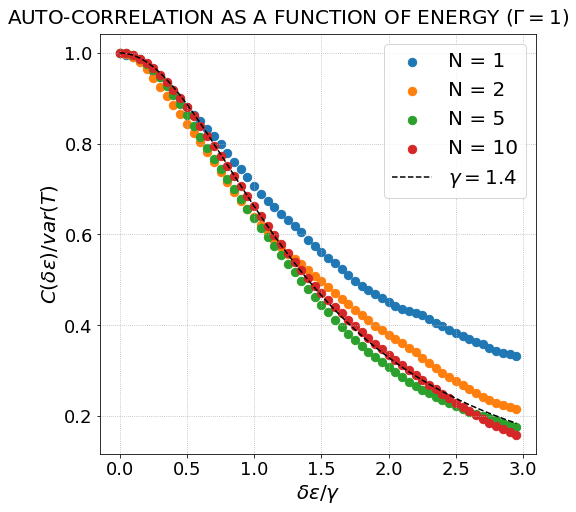

In [15]:
fig, axs = plt.subplots(1,1, figsize = (7,7), constrained_layout = True)
fig.suptitle(r'AUTO-CORRELATION AS A FUNCTION OF ENERGY $(\Gamma = 1)$', fontsize = 20)


axs.scatter(x, c_1, s = 70, label = 'N = 1')
axs.scatter(x, c_2, s = 70, label = 'N = 2')
axs.scatter(x, c_5, s = 70, label = 'N = 5')
axs.scatter(x, c_10, s = 70, label = 'N = 10')
#axs.scatter(x, c_15, s = 70, label = 'N = 15')
#axs.scatter(x, c_30, s = 70, label = 'N = 30')

axs.plot(x, Lorentzian(x, 1.4), label = r'$\gamma = 1.4$', color = 'black', linestyle = 'dashed')

axs.set_ylabel(r'$C(\delta \epsilon) / var(T)$', fontsize = 20)
axs.set_xlabel(r'$\delta \epsilon / \gamma$', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.grid(linestyle = ':')
axs.legend(fontsize = 20)
#axs.set_ylim((0,1.1))

In [16]:
def Mean_Density_of_Max(MOG_energy):
    (rows, columns) = np.shape(MOG_energy)
    max_counter = np.zeros((rows, columns))
    gamma = 1.4
    for i in range(rows):
        for j in range(1,columns-1):
            if ((MOG_energy[i,j-1] < MOG_energy[i,j]) and (MOG_energy[i,j] > MOG_energy[i,j+1])):
                max_counter[i,j] = 1
    rho = np.sum(max_counter, axis = 1)
    rho_mean = np.mean(rho)
    rho_mean_by_energy = rho_mean/((columns*0.1)/2) #interval: [0, 1.5]
    Constant_of_Proportionality = rho_mean_by_energy*gamma
    error_Constant_of_Proportionality = (np.std(rho*(gamma/(columns*0.1/2)))/np.sqrt(rows))
    return Constant_of_Proportionality, error_Constant_of_Proportionality

In [17]:
Density_max = np.zeros(10)
error_Density_max = np.zeros(10)
for i in range(10):
    Density_max[i], error_Density_max[i] = Mean_Density_of_Max(list_G_1[i][:,0:60])

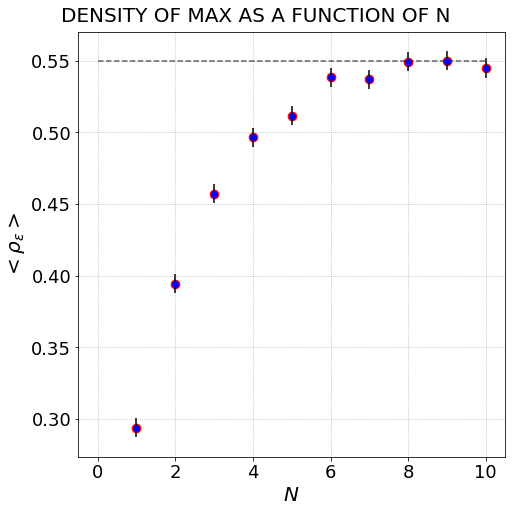

In [18]:
fig, axs = plt.subplots(1,1, figsize = (7,7), constrained_layout = True)
fig.suptitle(r'DENSITY OF MAX AS A FUNCTION OF N', fontsize = 20)

axs.plot([(i) for i in range(11)], [0.55 for i in range(11)], color = 'black', alpha = 0.6, linestyle = 'dashed')
axs.scatter([(i+1) for i in range(10)], Density_max, s = 75, color = 'red')
#axs.plot([(i+1) for i in range(10)], Density_max, color = 'black', alpha = 0.6)
axs.errorbar([(i+1) for i in range(10)], Density_max, yerr = error_Density_max[i],fmt='o',ecolor = 'black',color='blue')


axs.set_ylabel(r'$<\rho_{\epsilon}>$', fontsize = 20)
axs.set_xlabel(r'$N$', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.grid(linestyle = ':')
#axs.set_ylim(0.5,1.1)
#axs.legend(fontsize = 20)

In [335]:
list_G_1w = [None]*11
for i in range(11):
    df_G_1w = pd.read_csv(r'Energy/Energy_Gamma/G_O_Gamma_N1_'+str(i+1)+'.txt', sep='\t', header = None)
    MOG_energy_1w = df_G_1w.values
    list_G_1w[i] = MOG_energy_1w
    
list_G_2w = [None]*11
for i in range(11):
    df_G_2w = pd.read_csv(r'Energy/Energy_Gamma/G_O_Gamma_N2_'+str(i+1)+'.txt', sep='\t', header = None)
    MOG_energy_2w = df_G_2w.values
    list_G_2w[i] = MOG_energy_2w

list_G_5w = [None]*11
for i in range(11):
    df_G_5w = pd.read_csv(r'Energy/Energy_Gamma/G_O_Gamma_N5_'+str(i+1)+'.txt', sep='\t', header = None)
    MOG_energy_5w = df_G_5w.values
    list_G_5w[i] = MOG_energy_5w

list_G_10w = [None]*11
for i in range(11):
    df_G_10w = pd.read_csv(r'Energy/Energy_Gamma/G_O_Gamma_N10_'+str(i+1)+'.txt', sep='\t', header = None)
    MOG_energy_10w = df_G_10w.values
    list_G_10w[i] = MOG_energy_10w
    
list_G_15w = [None]*11
for i in range(11):
    df_G_15w = pd.read_csv(r'Energy/Energy_Gamma/G_O_Gamma_N15_'+str(i+1)+'.txt', sep='\t', header = None)
    MOG_energy_15w = df_G_15w.values
    list_G_15w[i] = MOG_energy_15w
    
list_G_30w = [None]*11
for i in range(11):
    df_G_30w = pd.read_csv(r'Energy/Energy_Gamma/G_O_Gamma_N30_'+str(i+1)+'.txt', sep='\t', header = None)
    MOG_energy_30w = df_G_30w.values
    list_G_30w[i] = MOG_energy_30w

(4, 2000, 61)


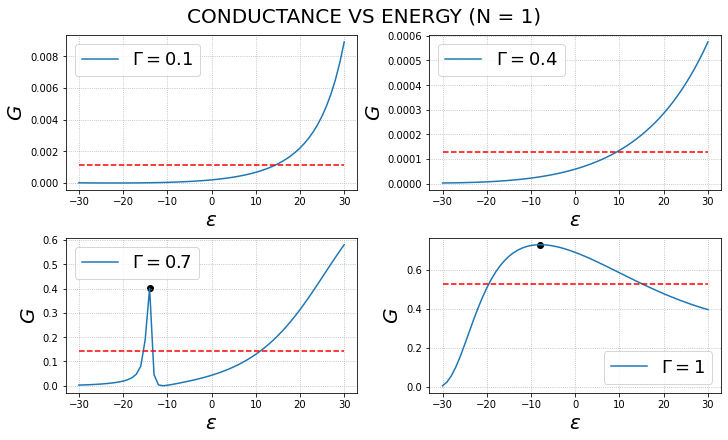

In [336]:
Conductance_Gamma_by_Energy_N1 = [None]*4

Conductance_Gamma_by_Energy_N1[0] = list_G_1w[1]
Conductance_Gamma_by_Energy_N1[1] = list_G_1w[4]
Conductance_Gamma_by_Energy_N1[2] = list_G_1w[8]
Conductance_Gamma_by_Energy_N1[3] = list_G_1w[10]

Plot_Max(Conductance_Gamma_by_Energy_N1, 1, 0)

(4, 2000, 61)


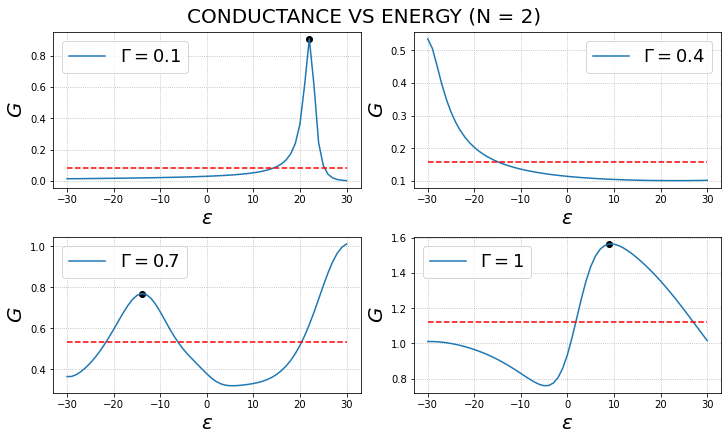

In [337]:
Conductance_Gamma_by_Energy_N2 = [None]*4

Conductance_Gamma_by_Energy_N2[0] = list_G_2w[1]
Conductance_Gamma_by_Energy_N2[1] = list_G_2w[4]
Conductance_Gamma_by_Energy_N2[2] = list_G_2w[8]
Conductance_Gamma_by_Energy_N2[3] = list_G_2w[10]

Plot_Max(Conductance_Gamma_by_Energy_N2, 2, 0)

(4, 2000, 61)


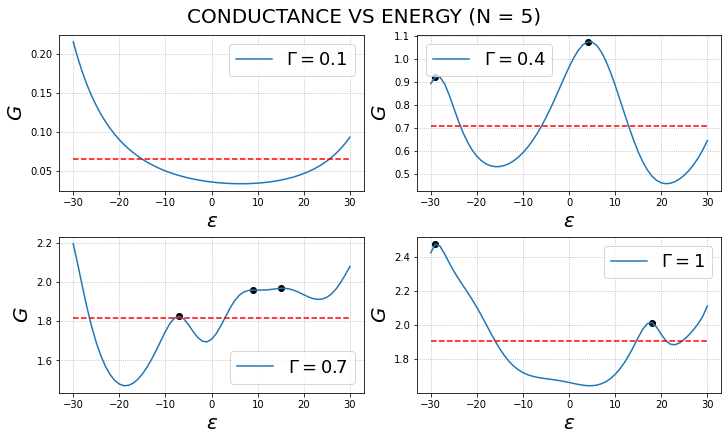

In [338]:
Conductance_Gamma_by_Energy_N5 = [None]*4

Conductance_Gamma_by_Energy_N5[0] = list_G_5w[1]
Conductance_Gamma_by_Energy_N5[1] = list_G_5w[4]
Conductance_Gamma_by_Energy_N5[2] = list_G_5w[8]
Conductance_Gamma_by_Energy_N5[3] = list_G_5w[10]

Plot_Max(Conductance_Gamma_by_Energy_N5, 5, 0)

(4, 2000, 61)


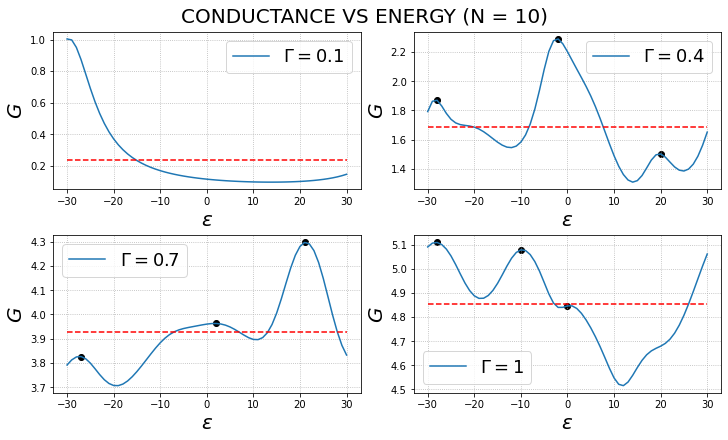

In [339]:
Conductance_Gamma_by_Energy_N10 = [None]*4

Conductance_Gamma_by_Energy_N10[0] = list_G_10w[1]
Conductance_Gamma_by_Energy_N10[1] = list_G_10w[4]
Conductance_Gamma_by_Energy_N10[2] = list_G_10w[8]
Conductance_Gamma_by_Energy_N10[3] = list_G_10w[10]

Plot_Max(Conductance_Gamma_by_Energy_N10, 10, 0)

(4, 2000, 61)


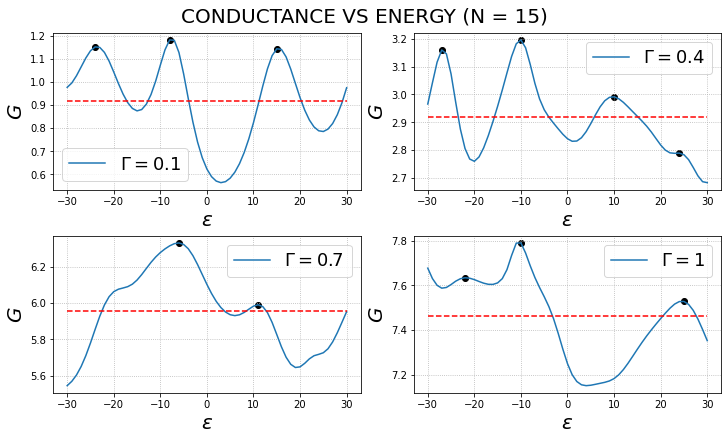

In [340]:
Conductance_Gamma_by_Energy_N15 = [None]*4

Conductance_Gamma_by_Energy_N15[0] = list_G_15w[1]
Conductance_Gamma_by_Energy_N15[1] = list_G_15w[4]
Conductance_Gamma_by_Energy_N15[2] = list_G_15w[8]
Conductance_Gamma_by_Energy_N15[3] = list_G_15w[10]

Plot_Max(Conductance_Gamma_by_Energy_N15, 15, 0)

(4, 500, 61)


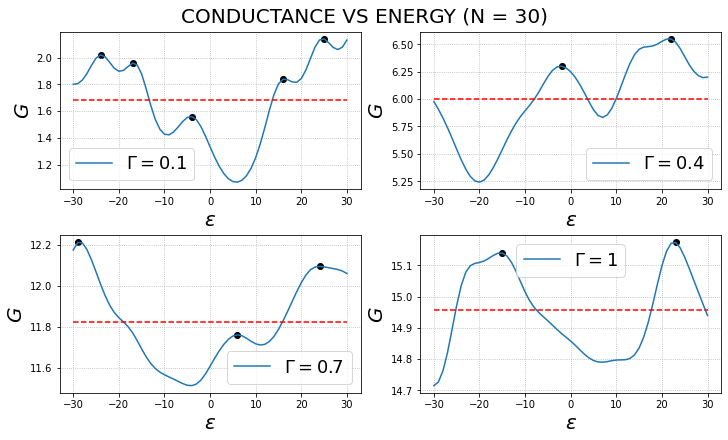

In [341]:
Conductance_Gamma_by_Energy_N30 = [None]*4

Conductance_Gamma_by_Energy_N30[0] = list_G_30w[1]
Conductance_Gamma_by_Energy_N30[1] = list_G_30w[4]
Conductance_Gamma_by_Energy_N30[2] = list_G_30w[8]
Conductance_Gamma_by_Energy_N30[3] = list_G_30w[10]

Plot_Max(Conductance_Gamma_by_Energy_N30, 30, 0)

In [342]:
c_1 = Auto_correlation(list_G_1w[10][:,0:61])
c_2 = Auto_correlation(list_G_2w[10][:,0:61])
c_5 = Auto_correlation(list_G_5w[10][:,0:61])
c_10 = Auto_correlation(list_G_10w[10][:,0:61])
c_15 = Auto_correlation(list_G_15w[10][:,0:61])
c_30 = Auto_correlation(list_G_30w[10][:,0:61])

In [343]:
(rows, columns) = np.shape(c_1)
x = np.zeros((1,columns))
x = [(1/20)*i for i in range(columns)]

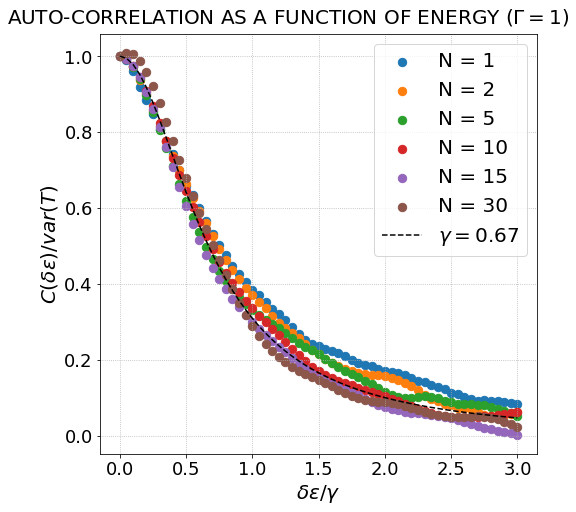

In [344]:
fig, axs = plt.subplots(1,1, figsize = (7,7), constrained_layout = True)
fig.suptitle(r'AUTO-CORRELATION AS A FUNCTION OF ENERGY $(\Gamma = 1)$', fontsize = 20)


axs.scatter(x, c_1, s = 70, label = 'N = 1')
axs.scatter(x, c_2, s = 70, label = 'N = 2')
axs.scatter(x, c_5, s = 70, label = 'N = 5')
axs.scatter(x, c_10, s = 70, label = 'N = 10')
axs.scatter(x, c_15, s = 70, label = 'N = 15')
axs.scatter(x, c_30, s = 70, label = 'N = 30')

axs.plot(x, Lorentzian(x, 0.67), label = r'$\gamma = 0.67$', color = 'black', linestyle = 'dashed')

axs.set_ylabel(r'$C(\delta \epsilon) / var(T)$', fontsize = 20)
axs.set_xlabel(r'$\delta \epsilon / \gamma$', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.grid(linestyle = ':')
axs.legend(fontsize = 20)
#axs.set_ylim((0,1.1))

In [345]:
def Mean_Density_of_Max(MOG_energy):
    (rows, columns) = np.shape(MOG_energy)
    max_counter = np.zeros((rows, columns))
    gamma = 0.67
    for i in range(rows):
        for j in range(1,columns-1):
            if ((MOG_energy[i,j-1] < MOG_energy[i,j]) and (MOG_energy[i,j] > MOG_energy[i,j+1])):
                max_counter[i,j] = 1
    rho = np.sum(max_counter, axis = 1)
    rho_mean = np.mean(rho)
    rho_mean_by_energy = rho_mean/((columns*0.1)/2) #interval: [0, 2.5]
    Constant_of_Proportionality = rho_mean_by_energy*gamma
    error_Constant_of_Proportionality = (np.std(rho*(gamma/(columns*0.1/2)))/np.sqrt(rows))
    return Constant_of_Proportionality, error_Constant_of_Proportionality

In [346]:
Density_max_N1w = np.zeros(11)
error_Density_max_N1w = np.zeros(11)
for i in range(11):
    Density_max_N1w[i], error_Density_max_N1w[i] = Mean_Density_of_Max(list_G_1w[i][:,0:61])

Density_max_N2w = np.zeros(11)
error_Density_max_N2w = np.zeros(11)
for i in range(11):
    Density_max_N2w[i], error_Density_max_N2w[i] = Mean_Density_of_Max(list_G_2w[i][:,0:61])

Density_max_N5w = np.zeros(11)
error_Density_max_N5w = np.zeros(11)
for i in range(11):
    Density_max_N5w[i], error_Density_max_N5w[i] = Mean_Density_of_Max(list_G_5w[i][:,0:61])
    
Density_max_N10w = np.zeros(11)
error_Density_max_N10w = np.zeros(11)
for i in range(11):
    Density_max_N10w[i], error_Density_max_N10w[i] = Mean_Density_of_Max(list_G_10w[i][:,0:61])
    
Density_max_N15w = np.zeros(11)
error_Density_max_N15w = np.zeros(11)
for i in range(11):
    Density_max_N15w[i], error_Density_max_N15w[i] = Mean_Density_of_Max(list_G_15w[i][:,0:61])
    
Density_max_N30w = np.zeros(11)
error_Density_max_N30w = np.zeros(11)
for i in range(11):
    Density_max_N30w[i], error_Density_max_N30w[i] = Mean_Density_of_Max(list_G_30w[i][:,0:61])

In [347]:
x = np.linspace(0, 1, 20)
rho_analytical = np.zeros(20)
for i in range(20):
    rho_analytical[i] = (np.sqrt(3)/np.pi)*np.sqrt((9*(x[i]**2)-18*x[i]+10)/(5*(x[i]**2)-10*x[i]+6))

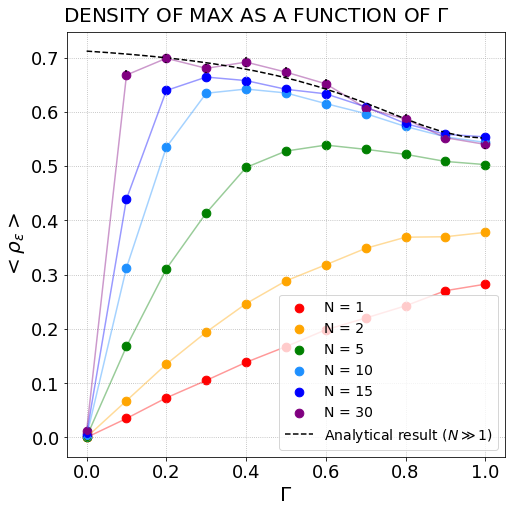

In [348]:
fig, axs = plt.subplots(1,1, figsize = (7,7), constrained_layout = True)
fig.suptitle(r'DENSITY OF MAX AS A FUNCTION OF $\Gamma$', fontsize = 20)
x_scatter = [(i/10) for i in range(11)]

axs.scatter(x_scatter, Density_max_N1w, label = 'N = 1', s = 75, color = 'red')
axs.errorbar(x_scatter, Density_max_N1w, yerr = error_Density_max_N1w,fmt='o',ecolor = 'black',color='red')
axs.plot(x_scatter, Density_max_N1w, color = 'red', alpha = 0.4)
axs.scatter(x_scatter, Density_max_N2w, label = 'N = 2', s = 75, color = 'orange')
axs.errorbar(x_scatter, Density_max_N2w, yerr = error_Density_max_N2w ,fmt='o',ecolor = 'black',color='orange')
axs.plot(x_scatter, Density_max_N2w, color = 'orange', alpha = 0.4)
axs.scatter(x_scatter, Density_max_N5w, label = 'N = 5', s = 75, color = 'green')
axs.errorbar(x_scatter, Density_max_N5w, yerr = error_Density_max_N5w ,fmt='o',ecolor = 'black',color='green')
axs.plot(x_scatter, Density_max_N5w, color = 'green', alpha = 0.4)
axs.scatter(x_scatter, Density_max_N10w, label = 'N = 10', s = 75, color = 'dodgerblue')
axs.errorbar(x_scatter, Density_max_N10w, yerr = error_Density_max_N10w ,fmt='o',ecolor = 'black',color='dodgerblue')
axs.plot(x_scatter, Density_max_N10w, color = 'dodgerblue', alpha = 0.4)
axs.scatter(x_scatter, Density_max_N15w, label = 'N = 15', s = 75, color = 'blue')
axs.errorbar(x_scatter, Density_max_N15w, yerr = error_Density_max_N15w ,fmt='o',ecolor = 'black',color='blue')
axs.plot(x_scatter, Density_max_N15w, color = 'blue', alpha = 0.4)
axs.scatter(x_scatter, Density_max_N30w, label = 'N = 30', s = 75, color = 'purple')
axs.errorbar(x_scatter, Density_max_N30w, yerr = error_Density_max_N30w ,fmt='o',ecolor = 'black',color='purple')
axs.plot(x_scatter, Density_max_N30w, color = 'purple', alpha = 0.4)


axs.set_ylabel(r'$<\rho_{\epsilon}>$', fontsize = 20)
axs.set_xlabel(r'$\Gamma$', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.grid(linestyle = ':')
axs.plot(x,rho_analytical, label = r'Analytical result $(N \gg 1)$', color = 'black', linestyle = 'dashed')
#axs.set_ylim(0.0,0.1)
axs.legend(fontsize = 14, loc = 'best')